# Regresja jednej zmiennej

Plik `fires_thefts.txt` zawiera rzeczywiste dane zebrane przez _U.S. Commission on Civil Rights_, przedstawiające liczbę pożarów w danej dzielnicy na tysiąc gospodarstw domowych (pierwsza kolumna) oraz liczbę włamań w tej samej dzielnicy na tysiąc mieszkańców (druga kolumna). Celem jest stworzenie modelu przewidującego liczbę włamań na podstawie liczby pożarów.

## Zadania

Uruchom notatnik `slides/03/cls03-regresja_liniowa.ipynb`, szczegółowo przeanalizuj kod związany z regresją, a następnie wykonaj poniższe polecenia. Zadania należy wykonać w niniejszym notatniku, prezentacja wyników powinna być czytelna. 

1. Stwórz wykres punktowy dla danych z pliku `fires_thefts.txt`. Zwróć uwagę na poprawne oznaczenia osi, dodaj legendę. Następnie dodaj dowolną prostą z ręcznie dobranymi parametrami $\theta$, oblicz i wyświetl wartość jej błędu $J(\theta)$.
2. Oblicz parametry $\theta$ krzywej regresyjnej za pomocą macierzy normalnej. Otrzymane wyniki przedstaw na nowym wykresie.
3. Oblicz parametry $\theta$ krzywej regresyjnej za pomocą metody gradientu prostego (_Gradient Descent, GD_). Otrzymane wyniki przedstaw na nowym wykresie. Można wybrać wersję iteracyjną lub macierzową algorytmu GD.
4. Dla różnych wartości długości kroku $\alpha \in \{ 0.001, 0.01 , 0.1 \}$ stwórz wykres, który zilustruje progresję wartości $J(\theta)$ dla pierwszych 200 króków algorytmu GD. Wykres ma zatem na osi $x$ kroki od 0 do 200, na osi $y$ wartosci $J(\theta)$, oraz przedstawia trzy krzywe, po jednej dla każdej wartości $\alpha$.
5. Wykorzystując uzyskaną krzywą regresyjną przepowiedz liczbę włamań na 1000 mieszkańców dla dzielnicy, w której występuje średnio 50, 100, 200 pożarów na tysiąc gospodarstw domowych.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
import ipywidgets as widgets
from ipywidgets import fixed

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.display import display, Math, Latex

def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r'\end{array}\right]'
    return ltx

def regdots(x, y, xlabel, ylabel):    
    fig = pl.figure(figsize=(16*.6,9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter(x, y, c='r', s=80, label="Data")
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05,.05)
    pl.ylim(min(y)-1, max(y)+1)
    pl.xlim(min(x)-1, max(x)+1)
    return fig

def regline(fig, fun, theta, x):
    ax = fig.axes[0]
    x0, x1 = min(x), max(x)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    ax.plot(X, Y, linewidth='2', 
            label=(r'$y=%.2f+%.2f x$' % (theta[0], theta[1])))

def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    # try-except block is a fix for a bug in Poly3DCollection
    try:
        fig.legend(handles, labels, fontsize='15', loc='lower right')
    except AttributeError:
        pass
    
def h(theta, x):
    return theta[0] + theta[1]*x

def J(h, theta, x, y):
    m = len(y)
    return (1.0/(2*m) * sum((h(theta, x[i]) - y[i])**2 
                          for i in range(m)))

def Slide2(x, y, fun, show, theta0, theta1, Jout):
    fig = regdots(x, y)
    if(show):
        regline(fig, fun, [theta0, theta1], x)
        Jout.value = '%.4f' % J(fun, [theta0, theta1], x, y)
    legend(fig)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

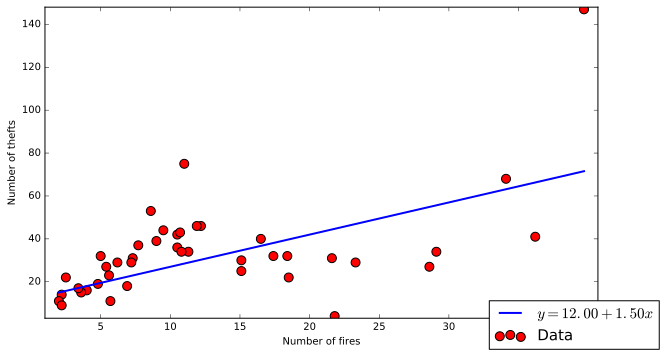

In [3]:
import csv
reader = csv.reader(open("fires_thefts.txt"), delimiter=",")

x = list()
y = list()
for xi, yi in reader:
    x.append(float(xi))
    y.append(float(yi)) 
    
xlabel = 'Number of fires'
ylabel = 'Number of thefts'

theta = [12, 1.5]

display(Math(r"\Large \theta = [ %.2f , %.2f ]" % (theta[0], theta[1])))
display(Math(r"\Large J(\theta) = %.4f" % J(h,[12, 1.5],x,y)))

fig2 = regdots(x, y, xlabel, ylabel)
regline(fig2, h, theta, x)

legend(fig2)

In [4]:
from IPython.display import display, Math, Latex

def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r'\end{array}\right]'
    return ltx

def hMx(theta, X):
    return X*theta

def regdotsMx(X, y):    
    fig = pl.figure(figsize=(16*.6,9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter(X[:,1], y, c='r', s=80, label="Data")
    
    ax.set_xlabel("Number of fires")
    ax.set_ylabel("Number of thefts")
    ax.margins(.05,.05)
    pl.ylim(y.min()-1, y.max()+1)
    pl.xlim(np.min(X[:,1])-1, np.max(X[:,1])+1)
    return fig

def reglineMx(fig, fun, theta, X):
    ax = fig.axes[0]
    x0, x1 = np.min(X[:,1]), np.max(X[:,1])
    L = [x0, x1]
    LX = np.matrix([1, x0, 1, x1]).reshape(2,2)
    ax.plot(L, fun(theta, LX), linewidth='2', 
            label=(r'$y=%.2f+%.2f x$' % (theta[0][0], theta[1][0])))
    
def hMx(theta, X):
    return X*theta

def JMx(theta,X,y):
    m = len(y)
    J = 1.0/(2.0*m)*((X*theta-y).T*(X*theta-y))
    return J.item()

def norm(X,y):
    return (X.T*X)**-1*X.T*y



<IPython.core.display.Math object>

<IPython.core.display.Math object>

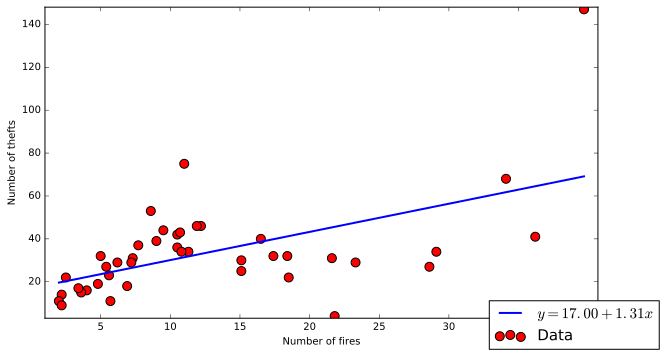

In [5]:
#Zad.2 
data = np.loadtxt("fires_thefts.txt", delimiter=",")
m, np1 = data.shape # np1 : n plus 1
n = np1 - 1
Xn = data[:,0:n].reshape(m,n)

# Dodaj kolumnę jedynek do macierzy
XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m,np1)
yMx = np.matrix(data[:,1]).reshape(m,1)

thetaNorm = norm(XMx, yMx)

display(Math(r'\Large \theta = ' + LatexMatrix(thetaNorm)))
display(Math(r'\Large J(\theta) = %.4f' % JMx(thetaNorm, XMx, yMx)))

fig = regdotsMx(XMx, yMx)
reglineMx(fig, hMx, thetaNorm, XMx);
legend(fig);


<IPython.core.display.Math object>

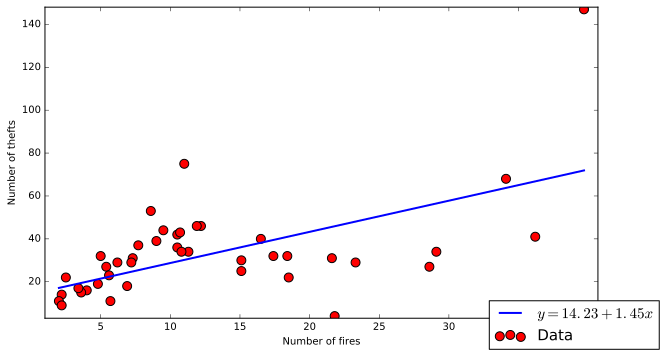

In [6]:
# Implementacja algorytmu gradient descent za pomocą numpy i macierzy

def dJMx(theta,X,y):
    return 1.0/len(y)*(X.T*(X*theta-y)) 

def GDMx(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-3):
    errorCurr = fJ(theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y) # implementacja wzoru
        errorCurr, errorPrev = fJ(theta, X, y), errorCurr
        if abs(errorPrev - errorCurr) <= eps:
            break
        errors.append([errorCurr, theta]) 
    return theta, errors

thetaStartMx = np.matrix([0,0]).reshape(2,1)

# Zmieniamy wartosci alpha (rozmiar kroku) oraz eps (kryterium stopu)
thetaBestMx, errors = GDMx(JMx, dJMx, thetaStartMx, 
                       XMx, yMx, alpha=0.0001, eps=0.0001)

display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(thetaBestMx) + 
             (r' \quad J(\theta) = %.4f' % errors[-1][0])  
             + r' \quad \textrm{po %d iteracjach}' % len(errors)))  

fig = regdotsMx(XMx, yMx)
reglineMx(fig, hMx, thetaBestMx, XMx);
legend(fig);

<IPython.core.display.Math object>

Dla wartości alfa 0.01 oraz 0.1 nie możemy znaleźć minimum, gdyż krok jest zbyt duży i przez to wartość J od pewnego momentu rośnie zamiast maleć


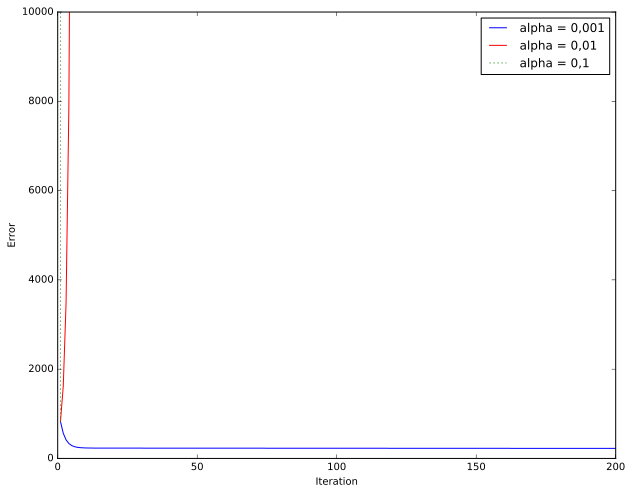

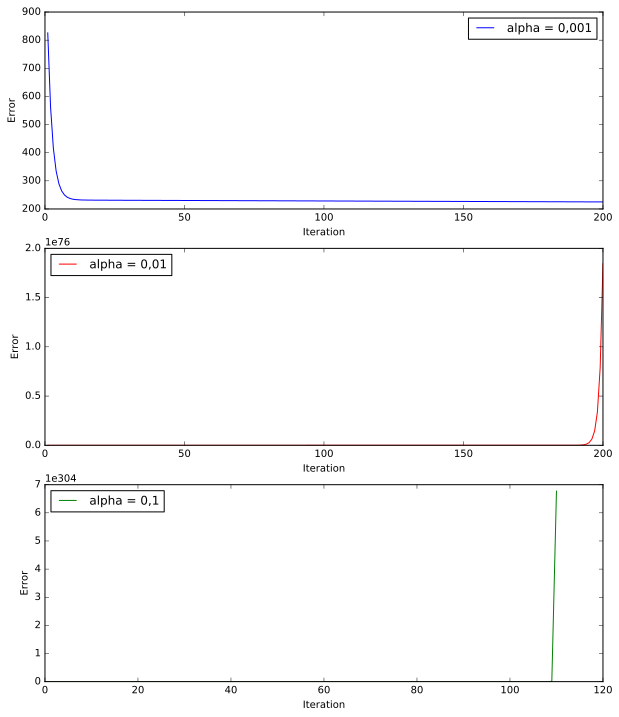

In [11]:
#α∈{0.001,0.01,0.1}  stwórz wykres, który zilustruje progresję wartości  J(θ)  dla pierwszych 200 króków 
import matplotlib.pyplot as plt

def GDMx_1(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-3):
    errorCurr = fJ(theta, X, y)
    errors = [[errorCurr, theta]]
    i = 0
    while (i<=201):
        theta = theta - alpha * fdJ(theta, X, y) # implementacja wzoru
        errorCurr, errorPrev = fJ(theta, X, y), errorCurr
        if abs(errorPrev - errorCurr) <= eps:
            break
        errors.append([errorCurr, theta]) 
        i = i+1
    return theta, errors


#0.001
thetaStartMx = np.matrix([0,0]).reshape(2,1)

thetaBestMx, errors = GDMx(JMx, dJMx, thetaStartMx, 
                       XMx, yMx, alpha=0.001, eps=0.001)

display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(thetaBestMx) + 
             (r' \quad J(\theta) = %.4f' % errors[-1][0])  
             + r' \quad \textrm{po %d iteracjach}' % len(errors)))  

y = [[],[],[]]

for i in range(200):
    y[0].append(errors[i][0])
    
x = np.arange(1, 201, 1)

print("Dla wartości alfa 0.01 oraz 0.1 nie możemy znaleźć minimum, gdyż krok jest zbyt duży i przez to wartość J od pewnego momentu rośnie zamiast maleć")

#0.01
thetaStartMx = np.matrix([0,0]).reshape(2,1)

thetaBestMx, errors = GDMx_1(JMx, dJMx, thetaStartMx, 
                       XMx, yMx, alpha=0.01, eps=0.001)

for i in range(200):
    y[1].append(errors[i][0])

#0.1
thetaStartMx = np.matrix([0,0]).reshape(2,1)

thetaBestMx, errors = GDMx_1(JMx, dJMx, thetaStartMx, 
                       XMx, yMx, alpha=0.1, eps=0.001)

for i in range(200):
    y[2].append(errors[i][0])

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.plot(x, y[0], color = "blue", label='alpha = 0,001')
ax.plot(x, y[1], color = "red", label='alpha = 0,01')
ax.plot(x, y[2], color = "green", linestyle=":", label='alpha = 0,1')
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.set_ylim(0, 10000)
ax.legend(loc='upper right') 


#dodatkowo dla przejrzystości wszystkie trzy wykresy osobno
fig2 = plt.figure(figsize = (10,12))

bx = fig2.add_subplot(311)
bx.plot(x, y[0], color = "blue", label='alpha = 0,001')
bx.set_xlabel("Iteration")
bx.set_ylabel("Error")
bx.legend(loc='upper right') 

cx = fig2.add_subplot(312)
cx.plot(x, y[1], color = "red", label='alpha = 0,01')
cx.set_xlabel("Iteration")
cx.set_ylabel("Error")
cx.legend(loc='upper left') 

dx = fig2.add_subplot(313)
dx.plot(x, y[2], color = "green", label='alpha = 0,1')
dx.set_xlabel("Iteration")
dx.set_ylabel("Error")
dx.legend(loc='upper left') 


plt.show()

In [8]:
#zad.5

thetaNorm = norm(XMx, yMx)

theft = hMx(thetaNorm, np.matrix([1, 50]))
print('%.2f włamań na 1000 mieszkańców w dzielnicy, w której występuje średnio 50 pożarów na 1000 gospodarstw' % (theft))
theft = hMx(thetaNorm, np.matrix([1, 100]))
print('%.2f włamań na 1000 mieszkańców w dzielnicy, w której występuje średnio 100 pożarów na 1000 gospodarstw' % (theft))
theft = hMx(thetaNorm, np.matrix([1, 200]))
print('%.2f włamań na 1000 mieszkańców w dzielnicy, w której występuje średnio 200 pożarów na 1000 gospodarstw' % (theft))


82.67 włamań na 1000 mieszkańców w dzielnicy, w której występuje średnio 50 pożarów na 1000 gospodarstw
148.34 włamań na 1000 mieszkańców w dzielnicy, w której występuje średnio 100 pożarów na 1000 gospodarstw
279.69 włamań na 1000 mieszkańców w dzielnicy, w której występuje średnio 200 pożarów na 1000 gospodarstw
